<p>
<img src="https://drive.google.com/uc?export=view&id=11V3n1rpH6yrleTIJcS5Y01QblGW7DiZ4" style="float: center"/>
</p>

# Vibração Livre Amortecida

A equação do movimento de um sistema massa mola de 1 Grau de Liberdade, com massa $m$, amortecimento $c$ e rigidez $k$ para descrito por $x$.

$$
m \ddot{x}(t) + c \dot{x} + k x(t) = 0
$$

<p>
<img src="https://drive.google.com/uc?export=view&id=1t831GctcB7xWBNU8ZsThdHHBB2OfbShu" style="float: center" width="300"/>
</p>

onde,
$ m $ é a massa $[kg]$
$ c $ é o amortecimento $[N s/m]$
$ k $ é a rigidez $[N/m]$

ou ainda,

$$
\ddot{u}(t) + 2 \xi \omega_n \dot{u} + \omega_n^2 u(t) = 0
$$

onde,
$\omega_n$ é a frequência natural $[rad/s]$,
$T $ é o período natural de oscilação $[s]$, ou seja $(T = 2\pi / \omega_n)$, e
$\xi $ é a razão de amortecimento $[adim]$, normalmente apresentada em porcentagem.


OBS: $f_n = \omega_n / (2\pi) [Hz]$

A solução analítica é dada pela expressão de deslocamento, para $0 \leq \xi \leq 1$,:

$$ u(t) = e^{-\xi \omega_n t} \left[ U_o \cos (\omega_d t) + \left( \frac{V_o + \xi \omega_n U_o}{\omega_d} \right) \sin (\omega_d t) \right] $$

onde,
$\omega_d = \omega_n \sqrt{1-\xi^2}$ é a frequência amortecida $[rad/s]$
$ U_o $ é o deslocamento inicial $[m]$, e
$ V_o $ é a velocidade inicial $[m/s]$.

Ou ainda,

$$ u(t) = A e^{-\xi \omega_n t} \cos (\omega_d t - \phi) $$

onde,
$A \cos \phi = U_o$ e $A \sin \phi = \frac{V_o + \xi \omega_n U_o}{\omega_d}$,

Logo,
a amplitude $$A = \sqrt{U_o^2 + \left( \frac{V_o + \xi \omega_n U_o}{\omega_d} \right)^2} $$
, e
o ângulo de fase $$\tan \phi =\left( {V_o + \xi \omega_n U_o} \right) / \left( {\omega_n U_o} \right) $$


## Exercício

Implementar uma rotina para calcular o deslocamento ${u} (t)$ e a velocidade $\dot{u}  (t)$ do sistema de 1 GDL amortecido,
<p>
<img src="https://drive.google.com/uc?export=view&id=1t831GctcB7xWBNU8ZsThdHHBB2OfbShu" style="float: center" width="300"/>
</p>

onde:
$$ m = 30 kg$$
$$k = 15000 N/m$$
e,
$$\xi = 1 \% $$

para as condições iniciais $u(0) = 1.0$ e $\dot{u} (0) = 0.0$.

**Responda as Questões:**

- Compare a solução numérica (`odeint`) do deslocamento $u (t)$ com a solução analítica, apresentada acima;

- Estime a razão de amortecimento $\xi_{estimado}$, pela técnica de decaimento exponencial.

**DICA:**

1. Utilize os comando `find_peaks` (**from** `scipy.signal`) para determinar a envoltoria $A e^{-\xi \omega_n t}$
2. Utilize os comando `numpy.polyfit` para determinar os coeficientes da reta
$
\log x = - \xi \omega_n t + b = a t + b
$
pelO método de mínimos quadrado.

## Implementação

### Importar as Bibliotecas

In [1]:
# 1GDL
import numpy as np
from math import sin
from math import cos
from math import exp
from math import pi
from scipy.integrate import odeint
from matplotlib import pyplot as plt

### Parâmetros do Sistema Massa Mola

In [2]:
# Parametros Fisicos
m = 30 # kg
k = 15000 # N/m
xi = 1/100

# Parâmetros Dinâmicos
wn = np.sqrt(k/m)  # frequência natural [Hz]
Tp = 2*pi/wn       # período [s]
display(Tp)

wd = wn*np.sqrt(1-xi**2)  # frequência natural [Hz]

# coeficiente de amortecimento
c= 2*xi*m*wn
display(c)


np.float64(0.280992589241629)

np.float64(13.416407864998739)

### Solução Analítica
Vamos plotar uma função senoidal do tipo
$$ x(t) = A e^{-\xi \omega_n t} \cos (\omega_d t - \phi) $$
e,

$$ v(t) = -\xi \omega_n A e^{-\xi \omega_n t} \cos (\omega_d t - \phi)
             - \omega_d A e^{-\xi \omega_n t} \sin (\omega_d t - \phi) $$

In [3]:
# Solução Analítica
U0 = 1.0 # deslocamento inicial
V0 = 0.0 # velocidade  inicial

# Amplitude e Fase
A = np.sqrt(U0**2 + ((V0 + U0*xi*wn)/wd)**2)
print(A)
phi = np.arctan((V0 + U0*xi*wn)/(wd*U0))
print(phi)

1.0000500037503124
0.010000166674167112


In [4]:
# Parâmetros Numéricos
delta = 0.01                     # passo de tempo [s]
time = np.arange(0.0, 3.0, delta) # time [s]

# deslocamento e velocidade
u = [A*exp(-xi*wn*t)*cos(wd*t-phi) for t in time] # eq.3.13 livro Aline
v = [-xi*wn*A*exp(-xi*wn*t)*cos(wd*t-phi)-wd*A*exp(-xi*wn*t)*sin(wd*t-phi) for t in time]


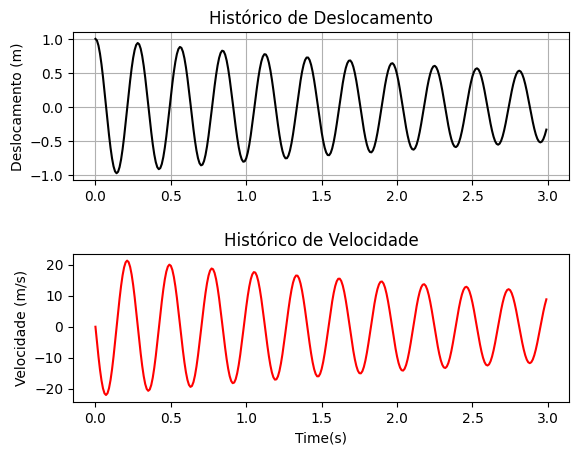

In [5]:
# Plotando os resultados
plt.figure()
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 1)
plt.plot(time,u,'k-')
plt.title('Histórico de Deslocamento')
#plt.xlabel('Time(s)')
plt.ylabel('Deslocamento (m)')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time,v,'r-')
plt.title('Histórico de Velocidade')
plt.xlabel('Time(s)')
plt.ylabel('Velocidade (m/s)')

plt.show()

### Integração no Tempo

Definição da Função da Equação de Estado

In [6]:
# Equacao do sistema
def sistemVibL(y,t):
    up = y[1]
    vp = -k/m * y[0] -c/m * y[1] #+ F/m
    dy = [up, vp]
    return dy

Solução do Integrador por `odeint`

In [7]:
# Definindo uma condicao initial
ui = 1.0
vi = 0.0

# Parâmetros Numéricos
dt    = 0.025                    # passo de tempo [s]
tnum  = np.arange(0.0, 3.0, dt)  # time [s]

# Solucionando o problema com um o odeint
# Using odeint function -> []=odeint(equations, [initial conditions], time)
uvnum = odeint(sistemVibL, [ui,vi], tnum)

### Comparar com Solução Analítica

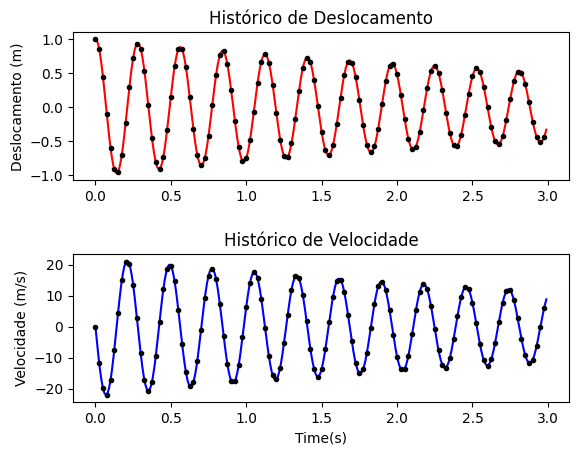

In [8]:
# Plotando os resultados
plt.figure()
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 1)
plt.plot(time,u,'r-')
plt.plot(tnum,uvnum[:,0],'k.')
plt.title('Histórico de Deslocamento')
#plt.xlabel('Time(s)')
plt.ylabel('Deslocamento (m)')

plt.subplot(2, 1, 2)
plt.plot(time,v,'b-')
plt.plot(tnum,uvnum[:,1],'k.')
plt.title('Histórico de Velocidade')
plt.xlabel('Time(s)')
plt.ylabel('Velocidade (m/s)')

plt.show()

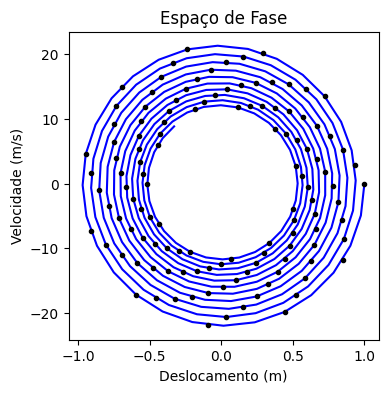

In [9]:
# Plotando os resultados
plt.figure(figsize=(4,4))

plt.plot(u,v,'b-')
plt.plot(uvnum[:,0],uvnum[:,1],'k.')
plt.title('Espaço de Fase')
plt.xlabel('Deslocamento (m)')
plt.ylabel('Velocidade (m/s)')

plt.show()

### Determinar a FFT

In [10]:
# Análise de frequência uma condicao initial
u_frq =  np.fft.fft(uvnum[:,0])
n = len(uvnum[:,0])
nhalf = int(np.floor(n/2))
frq = np.fft.fftfreq(n, d=dt)

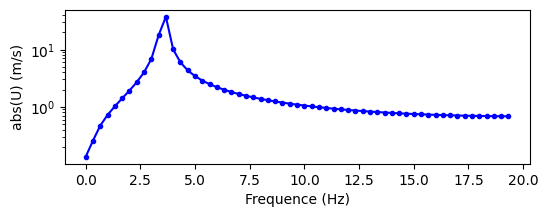

In [11]:
plt.figure(figsize=(6,2))
#plt.semilogy(frq,np.abs(u_frq))
plt.semilogy(frq[0:nhalf-1],np.abs(u_frq[0:nhalf-1]),'b.-')
plt.xlabel('Frequence (Hz)')
plt.ylabel('abs(U) (m/s)')
#plt.xlim(0,60)
plt.show()


In [12]:
from scipy.signal import find_peaks

u_frq_max = np.max(abs(u_frq))
peaks_index, properties = find_peaks(np.abs(u_frq),height=u_frq_max/2)
print('indice pico : ',peaks_index[0])
print('freq. pico',frq[peaks_index[0]])
print('freq. teo:',wn/(2*np.pi))
print('freq. damped:',wd/(2*np.pi))


indice pico :  11
freq. pico 3.6666666666666665
freq. teo: 3.5588127170858854
freq. damped: 3.558634772001293


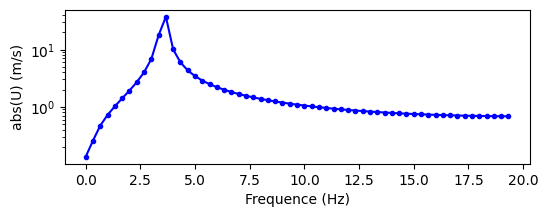

In [16]:
plt.figure(figsize=(6,2))
#plt.semilogy(frq[0:nhalf-1],np.abs(u_frq[0:nhalf-1]))
plt.semilogy(frq[0:nhalf-1],np.abs(u_frq[0:nhalf-1]),'b.-')
#plot peaks
#plt.semilogy(frq[...],np.abs(u_frq[...]),'b.-')
plt.xlabel('Frequence (Hz)')
plt.ylabel('abs(U) (m/s)')
#plt.xlim(0,60)
plt.show()

### Determinar a Envoltoria

A solução temporal de massa-mola com amortecimento subcrítico, é dado pela expressão:

$$ x(t) = A e^{-\xi \omega_n t} \cos (\omega_d t - \phi). $$

Como a função harmonico $\cos (\omega_d t - \phi)$ é limitada em $[-1; +1]$, temos uma envoltoria entorno de $u(t)$ dada pela expressão:

$$ a(t) = A e^{-\xi \omega_n t}. $$

TypeError: unsupported operand type(s) for *: 'int' and 'ellipsis'

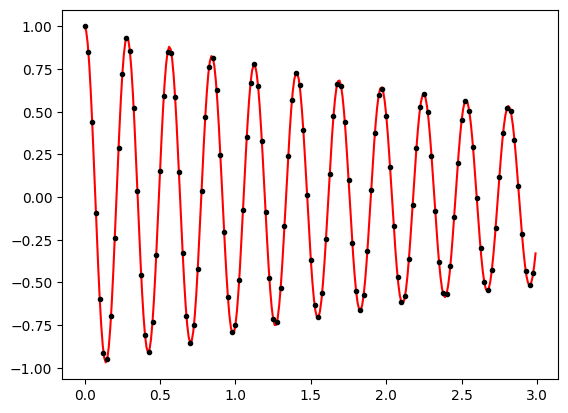

In [14]:
# envoltoria a(t)
a = [... for t in time] # eq.3.?? livro Aline

# Plotando os resultados
plt.figure()

plt.plot(time,u,'r-')
plt.plot(tnum,uvnum[:,0],'k.')
plt.plot(time,[+1*x for x in a],'b--')
plt.plot(time,[-1*x for x in a],'b--')
plt.title('Histórico de Deslocamento')
plt.xlabel('Time(s)')
plt.ylabel('Deslocamento (m)')

plt.show()


Aplica-se logaritmo $\ln(...)$ em ambos os lados da epxressão da envoltoria $a(t)$ a fim de obter a expressão linear:
$$ \ln a(t) = \ln A e^{-\xi \omega_n t} = \ln A -\xi \omega_n t .$$

Temos a expressão linear do tipo $$Y = c_0 - c_1 X ,$$
onde,
as coordenadas são dadas pela expressão $Y = ln a(t)$ e $X = t$,
e os coeficientes da equação linear são:
1. inclinação (coeficiente angular) $c_1 = \xi \omega_n$
2. constante  (coeficiente linear ) $c_0 = \ln A $


Logo, aplica-se o comando `find_peaks` (`from scipy.signal`) para determinar os valores da envoltoria:

In [ ]:
from scipy.signal import find_peaks

# determinar a envoltoria




# Plotando os resultados
plt.figure()

plt.plot(time,u,'r-')
plt.plot(time_envolt,u_envolt,'ko')
plt.plot(time,[+1*x for x in a],'b--')
plt.plot(time,[-1*x for x in a],'b--')
plt.title('Histórico de Deslocamento')
plt.xlabel('Time(s)')
plt.ylabel('Deslocamento (m)')

plt.show()


E, aplica-se o comando `polyfit` (`from numpy`), para determinar os coeficiente $c_0$ e $c_1$ da equação linear

$$Y = c_0 - c_1 X .$$

In [ ]:
# regressão linear Y = x

#logx = a t + b

# Para plotar a reta resultante (melhor ajuste LSE), vamos definir um vetor de tempo


# Plotando os resultados
plt.figure()

plt.plot(time_envolt, np.log(u_envolt), 'ro', label = 'Envoltoria a(t)')
plt.plot(tnum, c1*tnum + c0, '--k',           label = 'Ajuste, c1 = %2.2f e c0 = %2.2f' %(c1, c0))
plt.xlabel(r'$t_i$')
plt.ylabel(r'$\log x_i$')
plt.grid()
plt.legend()

plt.show()

### Estimando a Frequência Amortecida


In [2]:

# Plotando os resultados
plt.figure()

plt.hist(Tdim2[idx_outlierm2], 5)
plt.title(r'$T_{dm2}$ = %2.4f, $\sigma_{Tdm2}$ = %2.4f, , $\omega_{dm2}$ = %2.4f' %(Tdm2, sigma_Tdm2, wdm2))
plt.xlabel(r'$T_{dim2}$')
plt.ylabel('Histograma')
plt.xlim(0.26,0.31)

plt.show()

NameError: name 'plt' is not defined

Como o frequência amortecida $\omega_d = \omega_n \sqrt{1 - \xi^2}$, elevando ao quadrado em ambos os lados a expressão temos:

$$ \omega^2_d = \omega^2_n - \left( \xi \omega_n \right)^2 $$

Ou seja,

$$ \omega_d^2 = \omega^2_n - c_1^2 $$

Logo, a frequência natural $\omega_n$ pode ser estimada por:

$$ \omega_n = \sqrt{\omega_d^2 + c_1^2}$$



In [ ]:

print(c1)
print(wnm2)

## DESAFIO

Implementar uma rotina para calcular o deslocamento ${u} (t)$ e a velocidade $\dot{u}  (t)$ do sistema de 1 GDL **com atrito seco**,
<p>
<img src="pics/massa-mola-atrito_seco.svg" style="float: center" width="200"/>
</p>

onde:
$$ g = 10 m/s $$
$$ m = 0.5 kg$$
$$ k = 250 N/m$$
e,
$$\mu = 0.2 $$

para as condições iniciais $u(0) = 1.0$ e $\dot{u} (0) = 0.0$.

**Responda as Questões:**

- Modelo o comportamento de um sistema massa-mola com atrito seco por equação diferencial;

- Compare a solução numérica (`odeint`) do deslocamento $u (t)$ com a solução analítica;

- Estime o coeficiente de atrito $\mu$ pela técnica de decaimento linear.
